In [1]:
import numpy as np

import pandas as pd
from scipy import interpolate

In [92]:
from tensorflow import keras

In [93]:
#download fashion mnist data for testing
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [88]:
#Function input 2-dimensional image with misssing values 
#return interpolated image with given method
def find_missing_values(image):
  rows,cols = image.shape
  x = np.arange(0,cols)
  y = np.arange(0,rows)
  array = np.ma.masked_invalid(image)
  xx, yy = np.meshgrid(x,y)
  x_valid = xx[~array.mask]
  y_valid = yy[~array.mask]
  newarr = image[~array.mask]
  gd = interpolate.griddata((x_valid,y_valid),newarr.ravel(),(xx,yy),method='cubic')
  gd = np.nan_to_num(gd)
  gd[gd==0] = gd.mean()
  return gd

In [89]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


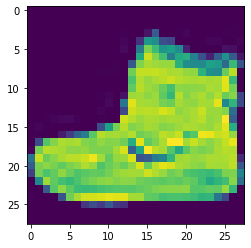

In [90]:
A = train_images[0]
plt.imshow(A)

In [91]:
A = np.array(A,dtype=np.float)

In [85]:
A_ = np.copy(A)
c = int((A.shape[0]*A.shape[1])/2)
A_.ravel()[np.random.choice(A.size,c,replace=False)] = np.nan
A_ = np.array(A_)

In [86]:
AInterPolate = find_missing_values(image=A_)

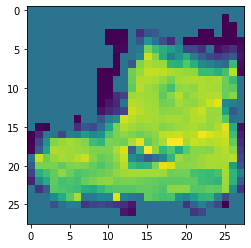

In [87]:
plt.imshow(AInterPolate)